<hr>

## 1. Data Preprocessing and Exploratory Analysis:
   
<hr>

In [2]:
import pandas as pd

# Import Raisin dataset from a csv file
try:
    data = pd.read_csv("Dataset.csv")
except FileNotFoundError:
    print("File not found in the same directory")
    data = None

# Confim dataset integrity and any missing values

if data is not None:
    print(data.info())
    print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   label            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB
None
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
label              0
dtype: int64


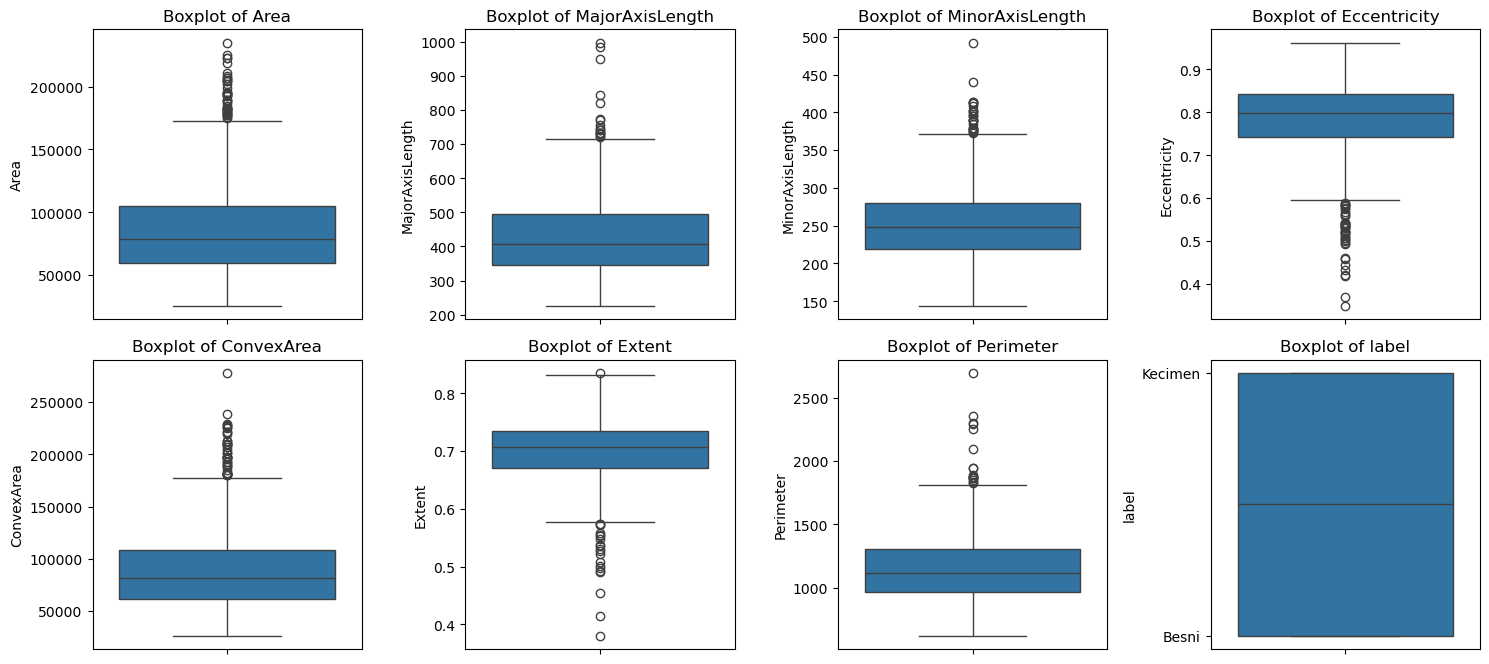

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify and analyze outlers using visualizations such as boxplots
plt.figure(figsize = (15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()

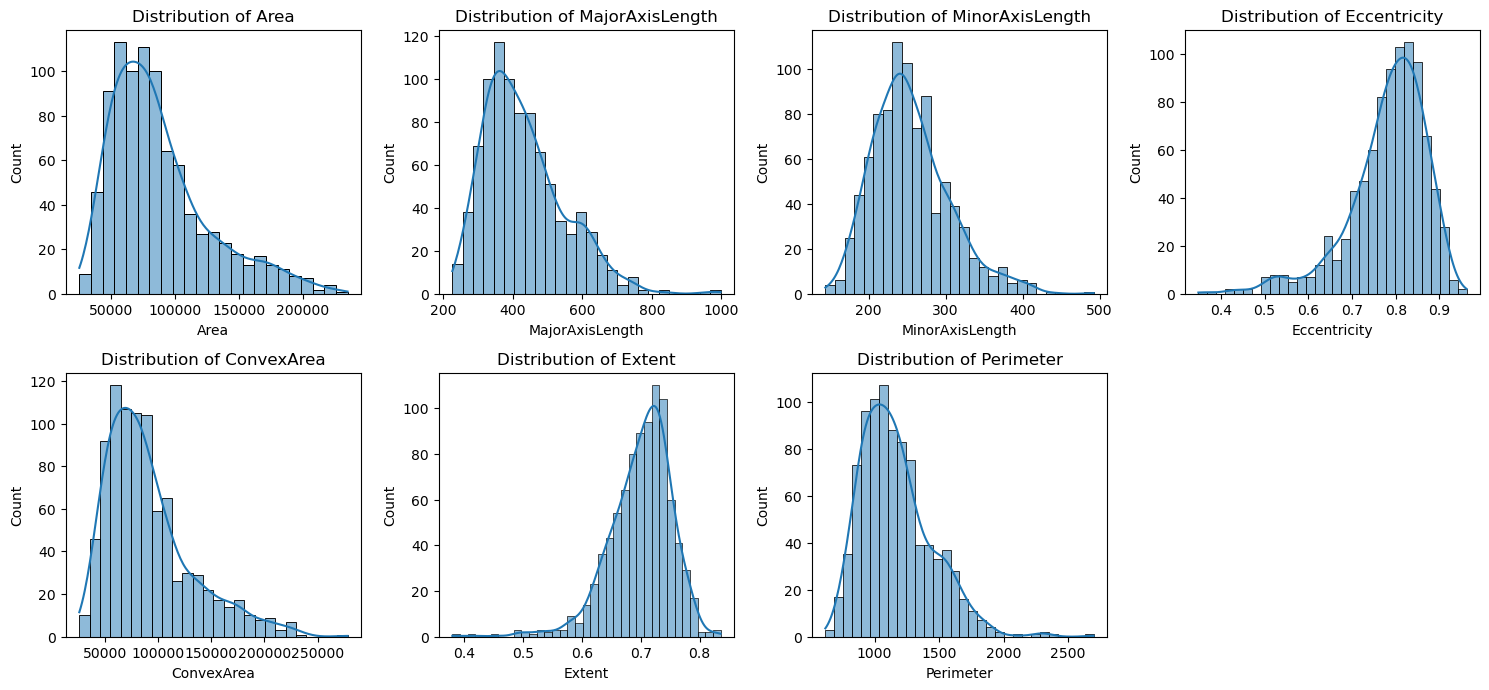

In [4]:
'''
Create sub-dataset containing only features and another with label then 
visualize feature distributions with histograms and KDE plots to understand the overall distribution of each feature.

'''

features = data.iloc[:,:-1]
plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(features[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

In [5]:
# Review feature statistics (e.g., mean, standard deviation) to get insights into the data.
features.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalize or standardize the dataset so that all features contribute equally in distance calculations, which is crucial for clustering.
cols = features.columns.tolist()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(features[cols])

# Create copy of scaled features 
features_scld = features.copy()
features_scld[cols] = scaled
features_scld.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.297706,0.266050,0.317810,0.705602,0.258044,0.701609,0.263067
std,0.186026,0.150370,0.143414,0.147244,0.161733,0.117358,0.131701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.161981,0.155267,0.216317,0.640756,0.140331,0.638749,0.167095
50%,0.255247,0.236080,0.298761,0.733812,0.220218,0.718859,0.240747
75%,0.379859,0.348025,0.390682,0.805095,0.326235,0.779492,0.331612
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<hr>

## 2. Impact of the Number of Clusters on KMeans Clustering with Euclidean Distance
<hr>

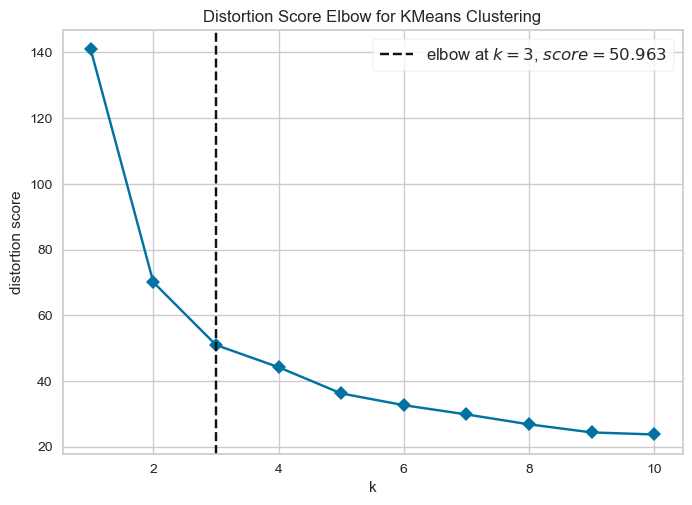

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

"""
Apply KMeans clustering using Euclidean distance on the standarise dataset.
Using KElbowVisualizer compute inertia for range (1 to 10) and plot values to identify "elbow" point.

"""
X = features_scld
Y = data.iloc[:,-1]

model = KMeans()
visualizer = KElbowVisualizer( model, k = (1,11), metric = 'distortion', distance_metric = 'euclidean', timings = False)

visualizer.fit(X)
visualizer.show()


<hr>

## 3. Evaluating the Stability of KMeans and KMeans++ Initialization
   
<hr>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

'''
Compute and compare the average inertia (SSE) and the Silhouette Score for KMeans and KMeans++ over 50 iterations.
'''
runs = 50
optimal_k = 3 # Observered from the previous task
inertia_randlst = []
silhouette_randlst = []

inertia_plus_lst = []
silhouette_plus_lst = []

for i in range(runs):
    
    # Run KMeans clustering using Standard random initialization and calculate SSE and the Silhouette score 
    kmeans_random = KMeans(n_clusters = optimal_k, init = 'random', random_state = i)
    kmeans_random.fit(features_scld)
    inertia_randlst.append(kmeans_random.inertia_)
    silhouette_randlst.append(silhouette_score(features_scld, kmeans_random.labels_))

    # Run KMeans clustering using KMeans++ initialization and calculate SSE and the Silhouette score 
    kmeans_plus = KMeans(n_clusters = optimal_k, init = 'k-means++', random_state = i)
    kmeans_plus.fit(features_scld)
    inertia_plus_lst.append(kmeans_plus.inertia_)
    silhouette_plus_lst.append(silhouette_score(features_scld, kmeans_plus.labels_))


# Compute and compare the average inertia (SSE) and the Silhouette Score for each method over these iterations.
inertia_rand_mean = np.mean(inertia_randlst)
silhouette_rand_mean = np.mean(silhouette_randlst)

inertia_plus_mean = np.mean(inertia_plus_lst)
silhouette_plus_mean = np.mean(silhouette_plus_lst)

print(f"Random Initialization (Avg over {runs} runs):")
print(f"  Average Inertia (SSE): {inertia_rand_mean:.4f}")
print(f"  Average Silhouette Score: {silhouette_rand_mean:.4f}")

print(f"\nKMeans++ Initialization (Avg over {runs} runs):")
print(f"  Average Inertia (SSE): {inertia_plus_mean:.4f}")
print(f"  Average Silhouette Score: {silhouette_plus_mean:.4f}")

Random Initialization (Avg over 50 runs):
  Average Inertia (SSE): 50.9613
  Average Silhouette Score: 0.3372

KMeans++ Initialization (Avg over 50 runs):
  Average Inertia (SSE): 50.9696
  Average Silhouette Score: 0.3356


<hr>

## 4. Clustering Evaluation Using Purity and Mutual Information

* Purity Score: Measures how homogeneous each cluster is relative to the true
labels.
* Mutual Information Score: Quantifies the mutual dependence between the
clustering results and the true labels.
* Silhouette Score: Evaluates the clustering quality without reference to the
ground truth by comparing intra-cluster cohesion versus inter-cluster
separation.
   
<hr>

In [12]:
from sklearn import metrics
from sklearn.metrics import silhouette_score, normalized_mutual_info_score

label = data['label']
optimal_k = 3 


# Calculate purity score using contingency matrix from sklearn.metrics module. 
def purity_score(y_true, y_pred):
    # compute contingency matrix 
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 


# Intialize KMeans with optimal number of clusters with random_state being a random fixed number
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=50)
kmeans_optimal.fit(features_scld)
cluster_labels = kmeans_optimal.labels_


# Calculate purity score
purity = purity_score(label, cluster_labels)

# Calculate mutual information
mi_score = normalized_mutual_info_score(label, cluster_labels)

# Calculate silhouette score
sil_score = silhouette_score(features_scld, cluster_labels)

print("\nClustering Evaluation Metrics:")
print(f"Purity Score: {purity:.4f}")
print(f"Normalized Mutual Information Score: {mi_score:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")



Clustering Evaluation Metrics:
Purity Score: 0.8278
Normalized Mutual Information Score: 0.3222
Silhouette Score: 0.3330


<hr>

## 5. Principal Component Analysis (PCA) for Dimensionality Reduction
   
<hr>

In [14]:
from sklearn.decomposition import PCA


# Apply PCA to reduce the dataset to 4 principal components.
pca = PCA(n_components = 4)
pca_results = pca.fit_transform(features_scld)

pca_col = [f'PC{i+1}' for i in range(4)]
pca_df = pd.DataFrame(pca_results, columns = pca_col)
pca_df.head()


,PC1,PC2,PC3,PC4
0,0.013518,-0.009493,0.142334,-0.004680
1,-0.081595,0.058443,-0.009333,0.016979
2,0.048447,0.071879,-0.110245,0.038714
3,-0.403742,-0.068519,-0.053109,-0.013445
4,-0.134115,-0.416232,-0.003819,-0.044074


In [15]:
# Determine number of components are needed to retain 90% of the total variance.
n_compnts = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1
print(f"\nNumber of components needed to retain 90% of variance: {n_compnts}")


Number of components needed to retain 90% of variance: 2


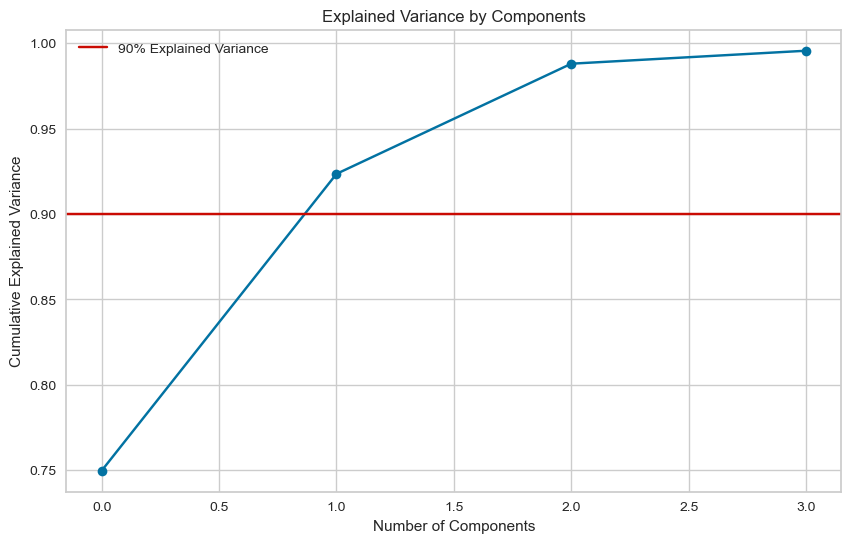

In [16]:
# Plot the cumulative variance explained by the principal components.
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.9, color='r', linestyle='-', label='90% Explained Variance')
plt.grid= True
plt.legend()

Text(0.5, 0.92, 'First Three Principal Components')

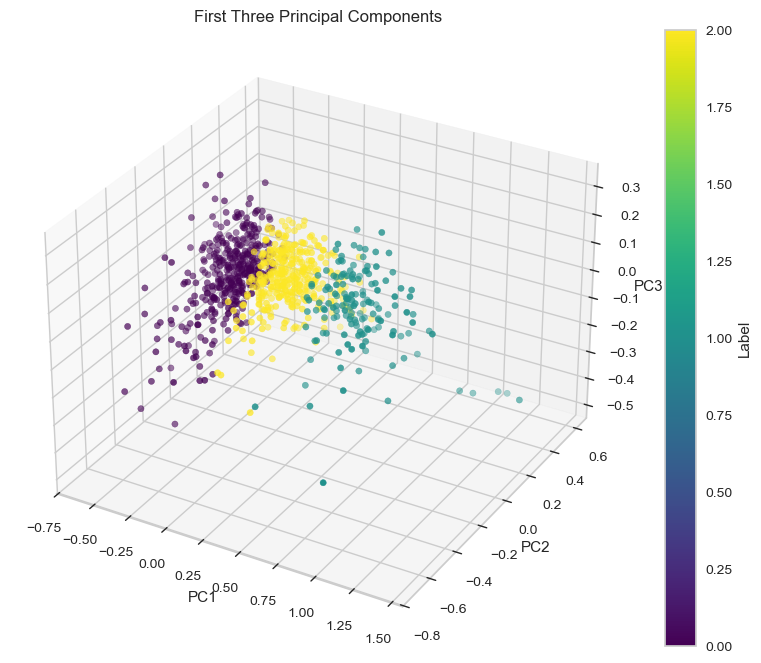

In [17]:
# Create a 3D scatter plot of the first three principal components using cluster labels from Task 4
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_results[:, 0], pca_results[:, 1], pca_results[:, 2], c = cluster_labels, cmap='viridis')
plt.colorbar(scatter, ax=ax, label='Label')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('First Three Principal Components')

<hr>

## 6. Density-Based Clustering Using DBSCAN with Euclidean and Mahalanobis Distance Metrics
   
<hr>

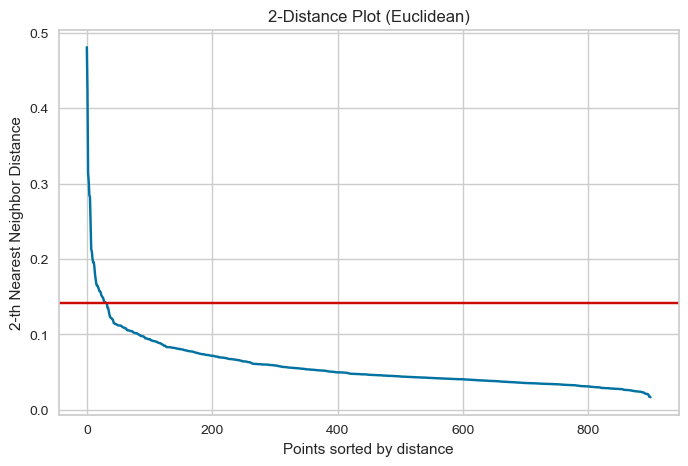

In [19]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


# k-distance plot to find optimal eps value to apply DBSCAN using Euclidean distance 
min_smpls_euclidean = 3 #features_scld.shape[1]+1
k_dist = min_smpls_euclidean - 1
nbrs = NearestNeighbors(n_neighbors=min_smpls_euclidean).fit(features_scld)
dist, ixd = nbrs.kneighbors(features_scld)
dist = sorted(dist[:, k_dist], reverse=True)

plt.figure(figsize=(8, 5))
plt.plot(dist)
plt.title(f'{k_dist}-Distance Plot (Euclidean)')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k_dist}-th Nearest Neighbor Distance')
plt.axhline(y=0.141, color='r', linestyle='-', label='optimal eps')
plt.grid=True


In [20]:
# Apply DBSCAN using eps estimated from the graph  
eps_euclidean = 0.141
dbscan_euclidean = DBSCAN(eps=eps_euclidean, min_samples=min_smpls_euclidean, metric='euclidean')
labels_euclidean = dbscan_euclidean.fit_predict(features_scld)

n_clusters_euclidean = len(set(labels_euclidean)) - (1 if -1 in labels_euclidean else 0)
n_noise_euclidean = list(labels_euclidean).count(-1)
print(f"DBSCAN (Euclidean) Results:")
print(f"  Estimated number of clusters: {n_clusters_euclidean}")
print(f"  Estimated number of noise points: {n_noise_euclidean}")
print(f"Based on number of different groups, which is {len(label.unique())} in the dataset, optimal minimum sample value is {min_smpls_euclidean} and eps is {round(eps_euclidean,4)} which results in {n_clusters_euclidean} clusters")

DBSCAN (Euclidean) Results:
  Estimated number of clusters: 2
  Estimated number of noise points: 21
Based on number of different groups, which is 2 in the dataset, optimal minimum sample value is 3 and eps is 0.141 which results in 2 clusters


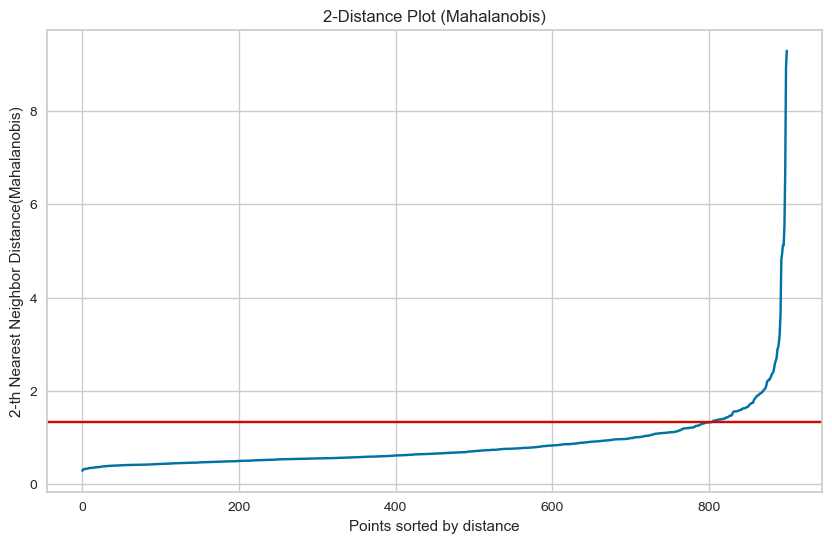

In [21]:
from scipy.linalg import inv
from scipy.spatial.distance import mahalanobis, pdist, squareform
from sklearn.cluster import DBSCAN

# Computing pairwise Mahalanobis distances
# Compute inverse covariance matrix
cov_matrix = np.cov(features_scld.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute the distance matrix
mahalanobis_distances = squareform(pdist(features_scld, metric='mahalanobis', VI=inv_cov_matrix))

# Creating a k-distance graph for Mahalanobis distance
# Find an appropriate eps for Mahalanobis distance
# We'll use a similar approach to the k-distance graph but for Mahalanobis
k = 2
# For each point, get the distance to its kth nearest neighbor
kth_distances = []
for i in range(len(mahalanobis_distances)):
    # Get distances to all other points, excluding itself
    distances_to_others = mahalanobis_distances[i]
    # Sort and get the kth smallest
    kth_distances.append(np.sort(distances_to_others)[k])

# Plot k-distance graph for Mahalanobis
plt.figure(figsize=(10, 6))
plt.plot(np.sort(kth_distances))
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k_dist}-th Nearest Neighbor Distance(Mahalanobis)')
plt.title(f'{k_dist}-Distance Plot (Mahalanobis)')
plt.axhline(y=1.34, color='r', linestyle='-', label='optimal eps')
plt.grid=True


In [22]:
# Running DBSCAN with Mahalanobis distance based on eps value estimated from the graph 
eps_mahalanobis = 1.34
dbscan_mahalanobis = DBSCAN(eps=eps_mahalanobis, min_samples=3, metric='precomputed')
dbscan_mahalanobis_labels = dbscan_mahalanobis.fit_predict(mahalanobis_distances)

# Count the number of clusters formed (excluding noise points)
n_clusters_mahalanobis = len(set(dbscan_mahalanobis_labels)) - (1 if -1 in dbscan_mahalanobis_labels else 0)
n_noise_mahalanobis = list(dbscan_mahalanobis_labels).count(-1)

print(f"\nDBSCAN with Mahalanobis Distance:")
print(f" Number of clusters: {n_clusters_mahalanobis}")
print(f" Number of noise points: {n_noise_mahalanobis}")
print(f"Based on number of different groups, which is {len(label.unique())} in the dataset, optimal minimum sample value is {3} and eps is {eps_mahalanobis} which results in {n_clusters_euclidean} clusters")


DBSCAN with Mahalanobis Distance:
 Number of clusters: 2
 Number of noise points: 72
Based on number of different groups, which is 2 in the dataset, optimal minimum sample value is 3 and eps is 1.34 which results in 2 clusters


In [23]:
# Computing silhouette scores for both DBSCAN approaches
silhouette_euclidean = "N/A"
silhouette_mahalanobis = "N/A"

silhouette_euclidean = silhouette_score(features_scld, labels_euclidean)
silhouette_mahalanobis = silhouette_score(features_scld, dbscan_mahalanobis_labels)

print(f"\nSilhouette Score (Euclidean): {silhouette_euclidean}")
print(f"Silhouette Score (Mahalanobis): {silhouette_mahalanobis}")



Silhouette Score (Euclidean): 0.24509431515079924
Silhouette Score (Mahalanobis): 0.37352762039710674


<hr>

## 7. Clustering Performance on PCA-Reduced vs. Full Dataset

<hr>

In [25]:
# Running KMeans on both original and PCA-reduced data
# Apply KMeans to full standardized dataset
kmeans_full = KMeans(n_clusters=optimal_k, random_state=42)
clusters_full = kmeans_full.fit_predict(features_scld)
silhouette_full = silhouette_score(features_scld, clusters_full)

# Apply KMeans to PCA-reduced dataset
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_results)
silhouette_pca = silhouette_score(pca_results, clusters_pca)

# Comparing clustering metrics between original and PCA-reduced data
print("\nClustering Performance Comparison:")
print(f"Silhouette Score (Full Dataset): {silhouette_full:.4f}")
print(f"Silhouette Score (PCA-Reduced): {silhouette_pca:.4f}")
print(f"Inertia (Full Dataset): {kmeans_full.inertia_:.2f}")
print(f"Inertia (PCA-Reduced): {kmeans_pca.inertia_:.2f}")

print(f"The PCA-transformed dataset results in clusters that are slightly less well-separated and compact compared to the full dataset, as indicated by the marginally lower silhouette score ({silhouette_pca:.4f} vs. {silhouette_full:.4f}) and slightly lower inertia ({kmeans_pca.inertia_:.2f} vs. {kmeans_full.inertia_:.2f}), suggesting minimal impact on clustering performance.")



Clustering Performance Comparison:
Silhouette Score (Full Dataset): 0.3372
Silhouette Score (PCA-Reduced): 0.3358
Inertia (Full Dataset): 50.96
Inertia (PCA-Reduced): 50.47
The PCA-transformed dataset results in clusters that are slightly less well-separated and compact compared to the full dataset, as indicated by the marginally lower silhouette score (0.3358 vs. 0.3372) and slightly lower inertia (50.47 vs. 50.96), suggesting minimal impact on clustering performance.


<hr>

## 8. Clustering Using t-SNE
   
<hr>

In [27]:
from sklearn.manifold import TSNE

# Applying t-SNE dimensionality reduction
tsne = TSNE(n_components=4, method='exact', random_state=42)
features_tsne = tsne.fit_transform(features_scld)

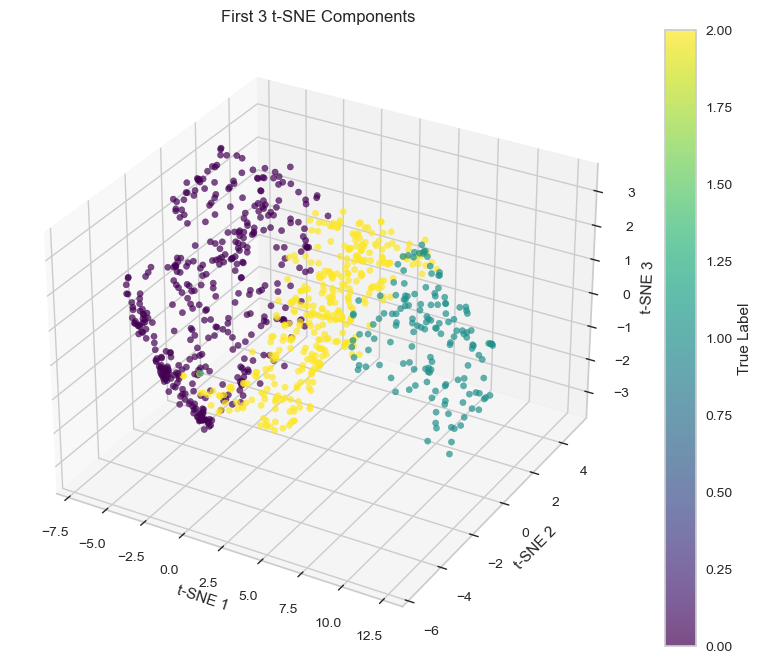

In [28]:
# Creating a 3D visualization of t-SNE components
# Create 3D scatter plot of first three t-SNE components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color points by their true label
scatter = ax.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], c=cluster_labels, cmap='viridis', alpha=0.7)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.colorbar(scatter, label='True Label')
plt.title('First 3 t-SNE Components')
plt.grid = True
plt.show()


In [29]:
# Running KMeans on t-SNE-reduced data
# Apply KMeans to t-SNE reduced data
kmeans_tsne = KMeans(n_clusters=optimal_k, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(features_tsne)
silhouette_tsne = silhouette_score(features_tsne, clusters_tsne)


# Computing performance metrics for t-SNE-based clustering
print("\nClustering on t-SNE reduced data:")
print(f"Silhouette Score: {silhouette_tsne:.4f}")
print(f"Inertia: {kmeans_tsne.inertia_:.2f}")


Clustering on t-SNE reduced data:
Silhouette Score: 0.3403
Inertia: 11670.72


In [30]:
# Final comparison of all clustering approaches
# Compare all three clustering approaches
print("\nFinal Comparison of All Approaches:")
print(f"Silhouette Score (Full Dataset): {silhouette_full:.4f}")
print(f"Silhouette Score (PCA-Reduced): {silhouette_pca:.4f}")
print(f"Silhouette Score (t-SNE-Reduced): {silhouette_tsne:.4f}")


# Adding discussion on t-SNE vs PCA results
# Discussion on t-SNE vs PCA clustering results
print("\nDiscussion on t-SNE vs PCA:")
print("t-SNE often preserves local structure better than PCA, which can result in more distinct clusters.")
print("PCA is linear and focuses on preserving global variance, while t-SNE is non-linear and focuses on preserving local similarities.")
print("The choice between t-SNE and PCA depends on whether global structure or local neighborhoods are more important for the specific dataset.")



Final Comparison of All Approaches:
Silhouette Score (Full Dataset): 0.3372
Silhouette Score (PCA-Reduced): 0.3358
Silhouette Score (t-SNE-Reduced): 0.3403

Discussion on t-SNE vs PCA:
t-SNE often preserves local structure better than PCA, which can result in more distinct clusters.
PCA is linear and focuses on preserving global variance, while t-SNE is non-linear and focuses on preserving local similarities.
The choice between t-SNE and PCA depends on whether global structure or local neighborhoods are more important for the specific dataset.
